Physics Informed Neural Networks - June 2024

* Dr. Mohammad Samara
* Udemy

2D Burgers Equation - Mathematically modeling a heated aluminum rod

* Solving the equation notebook
* Uses numerical equations using finite differences
* The script sets up the domain, initializes the temperature distribution, and visualizes the initial temperature contour plot.

Fields

* $\large\ u(x,y,t)$

* $\large\ v(x,y,t)$

Kinematic viscosity

* $\large\nu\ =\Large\frac{\mu}{\rho} =\large\frac{DynamicViscosity}{density}$

General (viscous) Burgers Equation in one dimension

* $\Large\frac{\partial u}{\partial t} + u\Large\frac{\partial u}{\partial x} = \nu\Large\frac{\partial^2 u}{\partial x^2}$

Burgers Equation for Horizontal Velocity in two dimensions

*  $\Large\frac{\partial u}{\partial t} + u\Large\frac{\partial u}{\partial x} + v\Large\frac{\partial u}{\partial y} = \nu(\Large\frac{\partial^2 u}{\partial x^2})(\Large\frac{\partial^2 u}{\partial y^2})$

Burgers Equation for Vertical Velocity in two dimensions

*  $\Large\frac{\partial v}{\partial t} + u\Large\frac{\partial v}{\partial x} + v\Large\frac{\partial v}{\partial y} = \nu(\Large\frac{\partial^2 v}{\partial x^2})(\Large\frac{\partial^2 v}{\partial y^2})$

Numerical Equations using finite differences

Import python libraries to facilitate the work

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd
#import tensorflow as tf

Rod description constants



In [2]:
nx = 51  # Number of grid points along the rod in the x direction
ny = 51  # Number of grid points along the rod in the y direction
nu = 0.1  # Diffusion coefficient or kinematic viscosity

Time description constants

In [3]:
nt = 500  # Number of time steps
dt = 0.001  # Time step size

Structure the domain

In [4]:
dx = 2 / (nx - 1)  # Grid spacing in the x direction (domain is from 0 to 2)
dy = 2 / (ny - 1)  # Grid spacing in the y direction (domain is from 0 to 2)
x = np.linspace(0, 2, nx)  # Array of grid points in the x direction
y = np.linspace(0, 2, ny)  # Array of grid points in the y direction

Show the domain

In [5]:
x

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ])

Create a array

In [6]:
comb = np.zeros((ny, nx))  # Combined array for visualization (currently unused)

Show the array

In [7]:
comb

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
comb.shape

(51, 51)

Initialize arrays for temperature distribution

In [9]:
u = np.ones((ny, nx))  # Current time step for u velocity component
v = np.ones((ny, nx))  # Current time step for v velocity component

un = np.zeros((ny, nx))  # Previous time step for u velocity component (currently unused)
vn = np.zeros((ny, nx))  # Previous time step for v velocity component (currently unused)

uf = np.ones((nt, ny, nx))  # New time step for u velocity component
vf = np.ones((nt, ny, nx))  # New time step for v velocity component

Show the shapes

In [10]:
u.shape

(51, 51)

In [11]:
un.shape

(51, 51)

In [12]:
uf.shape

(500, 51, 51)

Initial conditions

In [13]:
# Set initial temperature distribution (heated region in the center)
u[int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
v[int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
uf[0, int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5
vf[0, int(0.75/dy):int(1.25/dy + 1), int(0.75/dy):int(1.25/dy + 1)] = 5

Plot

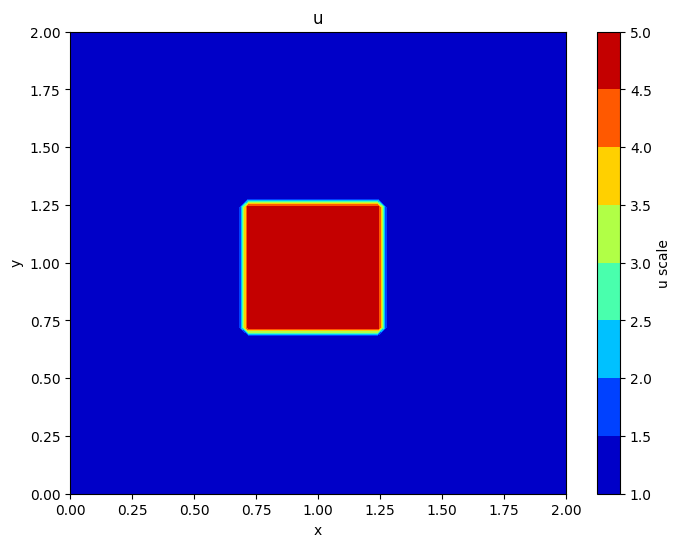

In [14]:
# Visualize initial temperature distribution
X, Y = np.meshgrid(x, y)  # Create 2D grid for visualization
plt.figure(figsize=(8, 6))  # Create a new figure with specified size
contour = plt.contourf(X, Y, u[:], cmap='jet')  # Create a contour plot of the temperature distribution
colorbar = plt.colorbar(contour)  # Add a colorbar to the plot
colorbar.set_label("u scale")  # Set the label for the colorbar
plt.title('u')  # Set the title of the plot
plt.xlabel('x')  # Set the label for the x-axis
plt.ylabel('y')  # Set the label for the y-axis
plt.show()  # Display the plot